In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

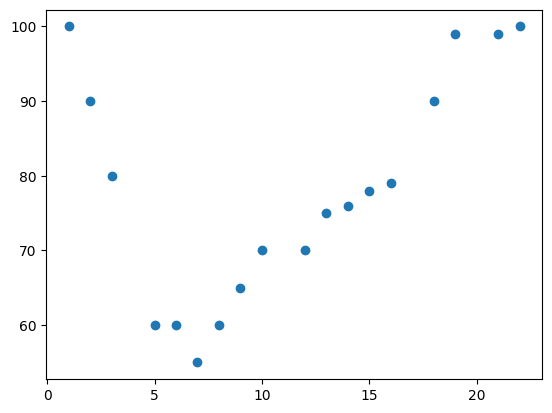

In [3]:
mymodel = np.poly1d(np.polyfit(x,y,3))
myline = np.linspace(1,22,100)
plt.scatter(x,y)
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv("Files/data.csv")

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [21]:
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42,  test_size=0.2) 

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
poly = PolynomialFeatures(degree=5)

In [26]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

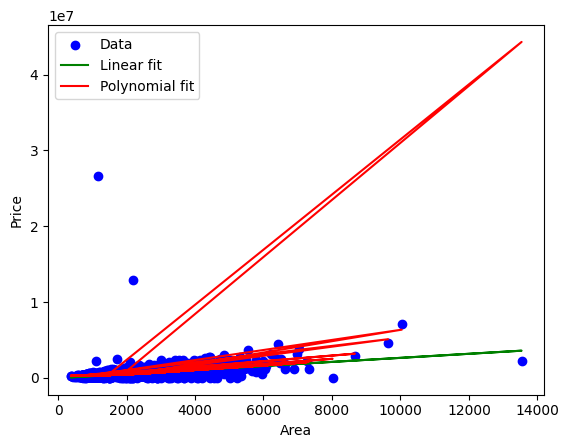

In [27]:
plt.scatter(X,y, color="blue", label="Data")
plt.plot(X,model.predict(X), color="green", label="Linear fit")
plt.plot(X,model_poly.predict(poly.transform(X)), color="red", label="Polynomial fit")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()